In [ ]:
import urllib.request as lib
import requests
import json
import os
import re
from collections import namedtuple
import pandas as pd
import numpy as np
import urllib

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


# Сбор

In [ ]:
from bs4 import BeautifulSoup
from time import time
import re
from datetime import datetime


In [ ]:
df_news_1 = pd.read_json("/content/drive/MyDrive/praka/news_v3/news_v5_bankiru_fin_nd.json")
df_news = pd.read_json("drive/My Drive/praka/paper/news_2308.json")

In [ ]:
df_news

In [ ]:
news_number = 0
start_time = time()
for i in range(0, 4000): 
  try:
    s = lib.urlopen("https://www.banki.ru/news/lenta/?id=" + str(10900775-i))
  except:
    print('HEY', str(i))
    continue
  s_text = s.read().decode()

  news_object = {}
  soup = BeautifulSoup(s_text, 'html.parser')

  news_object.update({"id":'1094' + str(i)})
  try:
    news_text = ' '.join(list(map(str, soup.find_all(class_="article-text plain-text markup-inside lenta")[0].contents)))
    news_object.update({"text": news_text})
  except:
    print('HEY', str(i))
    continue

  try:
    news_theme = re.findall(patt, str(soup.find_all(class_="bread-crumbs__item")[6]))[0]
    news_object.update({"theme": news_theme})
  except:
    news_object.update({"theme": 'NoTheme'})
    print('HEY1', str(i))
  try:
    news_source = soup.find_all(class_="margin-top-x-small")[0].a.contents[0]
    news_object.update({"source": news_source})
  except:
    news_object.update({"source": 'NoSource'})
    print('HEY2', str(i))

  news_date = soup.find_all('time')[0].text
  news_object.update({"date": news_date})
  
  try:
    news_topic = soup.find_all(class_="header-h0")[0].text
    news_object.update({"topic": news_topic})
  except:
    news_object.update({"topic": 'NoTopic'})

  news_list.append(news_object)
  news_number = news_number+1

  if len(news_list) % 100 == 0:
    print('Done:' + str(news_number) + '/')
    print(f'Time: {time() - start_time:.1f} sec\n')
  if len(news_list) % 500 == 0:
    print('Done:' + str(len(news_list)))
    with open('/content/drive/MyDrive/praka/news_v3/news_v4_'+str(news_number)+'.json', 'w', encoding='utf-8') as f:
      json.dump(news_list, f, ensure_ascii=False)
    news_list = []
    print(f'Time: {time() - start_time:.1f} sec\n Saved\n')

In [ ]:
len(news_list)

277

In [ ]:
n_list = []
fl = ['500', '1000', '1500', '2000', '2500']

In [ ]:
for i in fl:  
  with open('/content/drive/MyDrive/praka/news_v3/news_v4_'+i+'.json', 'r', encoding="utf-8") as f:
    a = json.load(f)
  n_list = n_list + a

In [ ]:
len(n_list)

2500

In [ ]:
with open('/content/drive/MyDrive/praka/news_v3/news_v4_news_bankiru.json', 'w', encoding='utf-8') as f:
  json.dump(n_list, f, ensure_ascii=False)

In [ ]:
with open('/content/drive/MyDrive/praka/news_v3/news_v4_news_bankiru.json', 'r', encoding="utf-8") as f:
    aaaa = json.load(f)

In [ ]:
news_number = 0
urls = []
start_time = time()
for i in df_news.iterrows(): 
  search_text = i[1].text
  try:
    s = lib.urlopen("https://www.banki.ru/search/?q=" + urllib.parse.quote_plus(search_text[0:150], encoding='cp1251')+"&where=iblock_news&how=", timeout=3)
  except:
    print('HEY1    '+search_text[0:150])
    urls.append((i[0], 'ND'))
    continue
  s_text = s.read().decode(encoding='cp1251')

  news_object = {}
  try:
    news_url = re.findall(pattern, s_text)[0]
    urls.append((i[0], news_url))
  except:
    print('HEY2')
    urls.append((i[0], 'ND'))
    continue

  

#Анализ


In [ ]:
import pandas as pd

## Очистка

In [ ]:
df = pd.read_json('/content/drive/MyDrive/praka/news_v3/news_v4_bankiru_fin.json')

In [ ]:
df = df_news

In [ ]:
sss = df.source

In [ ]:
sss

In [ ]:
for i in range(0, len(sss)):
  sss[i] = re.sub("\n", "", sss[i])
for i in range(0, len(sss)):
  sss[i] = re.sub("\t", "", sss[i])
for i in range(0, len(sss)):
  sss[i] = re.sub(r" $", r"", sss[i])

In [ ]:
pd.unique(sss)

In [ ]:
df.source = sss

In [ ]:
sss = df.theme

In [ ]:
for i in range(0, len(sss)):
  if len(sss[i]) > 20:
    sss[i] = 'NoTheme'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.theme = sss

In [ ]:
df.groupby(df.theme).count().source

theme
NoTheme      1604
banks        1381
business      387
economics    1766
incident      385
market       1201
products      917
projects       66
world         293
Name: source, dtype: int64

In [ ]:
sss = df.topic

In [ ]:
for i in range(0, len(sss)):
  sss[i] = re.sub(r"\s+", r" ", sss[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.topic = sss

In [ ]:
sss = df.text

In [ ]:
sss[1000]

'Совокупный портфель просроченных долгов по ипотечным кредитам россиян за год вырос на 35% и по состоянию на 30 апреля достиг 80 млрд рублей против 59 млрд на ту же дату в прошлом году, говорится в исследовании бюро кредитных историй «Эквифакс». Отмечается, что просроченная задолженность по ипотеке демонстрирует устойчивый рост. Так, только за апрель портфель просроченных ипотечных долгов вырос на 5,4%, а с начала года — на 10,2%. Наблюдается прирост и количества «плохих» ипотечных кредитов. За апрель число таких ссуд выросло незначительно, менее чем на 100 штук, однако с начала года показатель прирос значительно существеннее — на 8,2%, или на 2,185 тыс. кредитов. Тем не менее доли «плохой» ипотеки как по объему портфеля, так и по количеству ипотечных кредитов за апрель не изменились и остаются на уровне 2,8% и 1,7% соответственно. По данным ЦБ, по итогам апреля российские банки выдали россиянам ипотечных кредитов на 7,021 трлн рублей, за месяц прирост составил 1,6%, а за год — 23,1%. 

In [ ]:
re.sub('<[^<]+?>', '', text)

In [ ]:
for i in range(0, len(sss)):
  sss[i] = re.sub(r"(\<(/?[^>]+)>)", r" ", sss[i])

In [ ]:
for i in range(0, len(sss)):
  sss[i] = re.sub(r"\s+", r" ", sss[i])

In [ ]:
for i in range(0, len(sss)):
  sss[i] = re.sub(r" $", r"", sss[i])

In [ ]:
for i in range(0, len(sss)):
  sss[i] = re.sub(r" \.", r".", sss[i])

In [ ]:
for i in range(0, len(sss)):
  sss[i] = re.sub(r"^ +", r"", sss[i])

In [ ]:
for i in range(0, len(sss)):  
  print(re.findall('\*', sss[i]), i)

In [ ]:
df.text = sss

In [ ]:
n_list = []
for i in zip(df.iterrows(), range(0,df.shape[0])):
  n_obj = {}
  n_obj.update({"text":i[0][1].text})
  n_obj.update({"theme":i[0][1].theme})
  n_obj.update({"date":str(i[0][1].date)})
  n_obj.update({"source":i[0][1].source})
  n_obj.update({"topic":i[0][1].topic})
  n_obj.update({"id":i[0][1].id})
  n_obj.update({"URL":i[0][1].url})
  n_list.append(n_obj)

In [ ]:
with open('drive/My Drive/praka/paper/news_2508.json', 'w', encoding='utf-8') as f:
  json.dump(n_list, f, ensure_ascii=False)

In [ ]:
pd.options.display.max_rows = 20

## pres

In [ ]:
df11 = pd.read_json('/content/drive/MyDrive/praka/news_v3/news_v3_bankiru_fin.json', encoding='utf-8')

NameError: ignored

In [ ]:
df11.shape

(5500, 6)

In [ ]:
df11.head()

,text,theme,date,source,topic,id
0,Банк России систематизировал основные виды нед...,banks,2021-02-08 15:34:00,Banki.ru,Банк России систематизировал основные виды нед...,10940
1,"Национальный Расчетный Депозитарий, входящий в...",market,2021-02-08 15:24:00,Национальный Расчетный Депозитарий,Мосбиржа улучшила условия налогового администр...,10942
2,Рейтинговое агентство «Национальные кредитные ...,banks,2021-02-08 15:25:00,СДМ-Банк,Агентство «НКР» подтвердило СДМ-Банку рейтинг ...,10943
3,Альфа-Банк запустил акцию по рефинансированию ...,products,2021-02-08 15:17:00,Альфа-Банк,​Альфа-Банк проводит акцию по рефинансированию...,10944
4,Правительство РФ приняло новые правила разрабо...,NoTheme,2021-02-08 14:49:00,Banki.ru,Госуслуги россиянам будут предлагать в проакти...,10945


In [ ]:
df11.groupby(df11.source).count().text

source
Banki.ru                 2285
DWelle                      2
Forbes                     10
NoSource                   63
RT                          5
                         ... 
Юг-Инвестбанк               1
Югра в «Книге Памяти»       5
ЮниКредит Банк              4
Яринтербанк                 1
агентство «Москва»          1
Name: text, Length: 293, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support, roc_auc_score

In [ ]:
tmp, df_sampled = 1, df11#train_test_split(df11, test_size=1, shuffle=True, random_state=43)

In [ ]:
from nltk import tokenize as tok
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
tok.sent_tokenize(df_sampled.iloc[0].text)

['Экспобанк с 4 февраля ввел два новых вклада — «Срочный ЭКСПО» и «Счастье».',
 'Депозит «Срочный ЭКСПО» открывается от 91 до 1 500 дней в рублях, от 181 до 732 дней в долларах и от 91 до 732 дней в евро.',
 'Минимальная сумма — 30 тыс.',
 'рублей или 500 долларов/евро.',
 'В рублях ставки составляют 4,1—5,4%, в долларах — 0,1—0,25%, в евро — 0,05—0,1% годовых.',
 'Дополнительные взносы и расходные операции не предусмотрены.',
 'Проценты выплачиваются ежемесячно на текущий счет или капитализируются.',
 'При досрочном расторжении договора выплата процентов осуществляется по ставке вклада до востребования.',
 'Срок вклада «Счастье» составляет 1 097 дней и разделен на 12 периодов начисления процентов, каждый процентный период равен трем месяцам: в первом периоде процентная ставка составляет 4,9% при сумме вклада от 10 тыс.',
 'рублей и 5,1% от 500 тыс.',
 'рублей.',
 'Далее, по всем последующим периодам проценты начисляются по ставке 1% годовых.',
 'Таким образом, средняя годовая процентн

In [ ]:
sampled_news_list = [] 
for i in df_sampled.iterrows():  
  sentence_list = []
  sl =  tok.sent_tokenize(i[1].text)
  a = list(map(sentence_list.append, sl))
  sampled_news_list.append(sentence_list)
print(len(sampled_news_list))

3777


In [ ]:
d_n = []
for i in sampled_news_list:
  a = list(map(d_n.append, i))

In [ ]:
len(d_n)
#d_n[356]

48213

!pip install transformers
from transformers import BertConfig, BertForSequenceClassification, BertTokenizer
PRE_TRAINED_MODEL_NAME = 'DeepPavlov/rubert-base-cased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
tokenizer

In [ ]:
def get_token_len(df, tokenizer):
    '''Функция для входного Dataframe возвращает список размеров текстов в токенах'''
    token_lens = []
    for txt in df.text:
        tokens = tokenizer.encode(txt)
        token_lens.append(len(tokens))
    return token_lens

min length = 34 tokens
max length = 2966 tokens


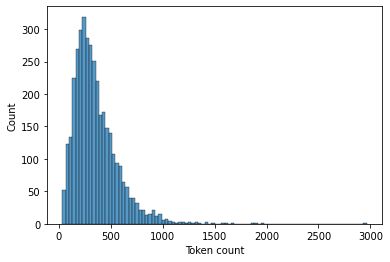

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

token_lens_train = get_token_len(df11, tokenizer)
print(f'min length = {min(token_lens_train)} tokens')
print(f'max length = {max(token_lens_train)} tokens')
sns.histplot(token_lens_train)
#plt.xlim([0, 256]);   # Сжать график
plt.xlabel('Token count');
MAX_LEN = max(token_lens_train)

# Корпус financial_review

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/financial_review.csv')

In [ ]:
df2.shape

(23810, 10)

In [ ]:
df2.head()

,bank_href,login,review,bank_name,site,date,message_href,score,status,user_href
0,/kredit-evropa-bank.html,NaN,"Брал кредит в данной организации, после погаше...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
1,/kredit-evropa-bank.html,NaN,"В 2011 году,мною была оформлена мега карта в Т...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
2,/kredit-evropa-bank.html,NaN,С родителями увидели рекламу вклада Осеннее пр...,кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
3,/kredit-evropa-bank.html,NaN,Связать три года своей жизни с этим непорядочн...,кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN
4,/kredit-evropa-bank.html,NaN,"Пользуюсь месяц карточкой Card Plus, сегодня п...",кредит европа банк,http://bankireview.ru,NaN,NaN,NaN,NaN,NaN


In [ ]:
pd.unique(df2.site)

array(['http://bankireview.ru', 'http://banki.ru',
       'https://www.sravni.ru'], dtype=object)